## Chapter 1.8: Onlap relationships
***
In some geologic cases we want to represent an onlap relationship, where layers deposited onto an erosive surface. This is also useful to model subduction zones as layers onlap the dipping plate. While surfaces in GemPy normally define the bottom of a unit, onlap surfaces represent the top surface, directly followed by other units.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

We import a model from an existing folder, representing a subduction zone with onlap relationships.
The theano function is automatically recombiled to allow changes.

In [2]:
geo_model = gp.load_model('Tutorial_ch1-8_Onlap_relations')

Compiling theano function...
Compilation Done!


In [3]:
#gp.set_interpolation_data(geo_model,  verbose=[])

Displaying the input data:

In [4]:
gp.activate_interactive_df(geo_model)

In [5]:
#geo_model.qi.get('orientations')

In [6]:
#geo_model.qi.get('surface_points')

In [7]:
geo_model.qi.get('surfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [8]:
geo_model.qi.get('series')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

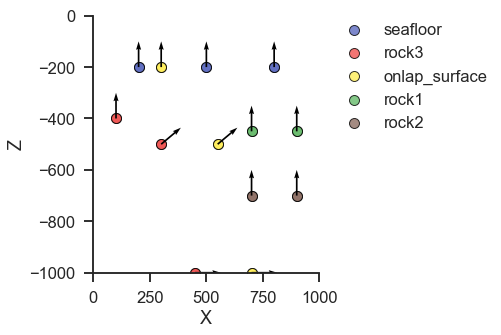

In [9]:
gp.plot.plot_data(geo_model, direction='y')

Update if any changes were made:

In [10]:
#geo_model.update_to_interpolator()
#gp.compute_model(geo_model, compute_mesh=False)

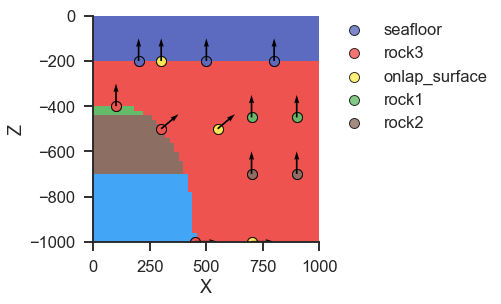

In [11]:
gp.plot.plot_section(geo_model, 2, plot_data=True)

Save model if any changes were made:

In [12]:
#geo_model.save_model('Tutorial_ch1-8_Onlap_relations')